In [37]:
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
from time import sleep

import warnings
warnings.filterwarnings('ignore')

sns.set()
import matplotlib.style as style
# style.use('seaborn-bright')

In [50]:
class GridWorldPlotter:
    def __init__(self, data):
        self.iter = data['iter']
        self.vi_steps = data['vi_steps']
        self.vi_time = data['vi_time']
        self.vi_rewards = data['vi_rewards']
        self.pi_steps = data['pi_steps']
        self.pi_time = data['pi_time']
        self.pi_rewards = data['pi_rewards']
        self.ql_steps = data['ql_steps']
        self.ql_time = data['ql_time']
        self.ql_rewards = data['ql_rewards']

    def plot(self):
        self.plot_value_iter()
        self.plot_policy_iter()
        self.plot_qlearning()
        
    def plot_value_iter(self):
        print('Value Iteration:')
        plt.figure()
        ax = sns.lineplot(self.iter, self.vi_steps)
        ax.set(xlabel='Iterations', ylabel='Steps')
        plt.figure()
        ax = sns.lineplot(self.iter, self.vi_time)
        ax.set(xlabel='Iterations', ylabel='Runtime (ms)')
        plt.figure()
        ax = sns.lineplot(self.iter, self.vi_rewards)
        ax.set(xlabel='Iterations', ylabel='Total Reward')
        
    def plot_policy_iter(self):
        print('Policy Iteration:')
        plt.figure()
        ax = sns.lineplot(self.iter, self.pi_steps)
        ax.set(xlabel='Iterations', ylabel='Steps')
        plt.figure()
        ax = sns.lineplot(self.iter, self.pi_time)
        ax.set(xlabel='Iterations', ylabel='Runtime (ms)')
        plt.figure()
        ax = sns.lineplot(self.iter, self.pi_rewards)
        ax.set(xlabel='Iterations', ylabel='Total Reward')
        
    def plot_qlearning(self):
        print('Q-learning:')
        plt.figure()
        ax = sns.lineplot(self.iter, self.ql_steps)
        ax.set(xlabel='Iterations', ylabel='Steps')
        plt.figure()
        ax = sns.lineplot(self.iter, self.ql_time)
        ax.set(xlabel='Iterations', ylabel='Runtime (ms)')
        plt.figure()
        ax = sns.lineplot(self.iter, self.ql_rewards)
        ax.set(xlabel='Iterations', ylabel='Total Reward')

In [51]:
data1 = {
    'iter': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
    'vi_steps': [46,382,481,40,10,21,20,9,10,13,14,14,10,12,15,11,11,10,13,11,14,12,14,11,11,19,11,11,16,9,11,10,10,12,12,11,20,10,13,10,11,15,11,13,15,14,13,10,12,10,9,11,12,15,19,12,11,11,13,12,12,11,12,12,11,11,12,9,15,13,10,11,11,11,15,18,16,12,14,11,18,12,10,9,10,12,9,14,14,14,10,14,14,11,9,10,12,10,10,10],
    'vi_time': [26,4,2,2,2,2,2,3,5,4,5,4,4,5,12,4,2,3,3,3,3,3,4,4,4,4,3,9,5,3,3,3,3,4,5,4,4,4,7,4,4,4,4,4,4,4,6,9,5,6,5,5,5,5,5,6,13,15,15,14,16,6,6,6,6,7,7,9,8,8,8,7,12,7,7,8,8,9,9,10,9,11,20,24,22,21,23,25,25,24,19,9,9,10,10,10,10,11,13,11],
    'vi_rewards': [56.0,-280.0,-379.0,62.0,92.0,81.0,82.0,93.0,92.0,89.0,88.0,88.0,92.0,90.0,87.0,91.0,91.0,92.0,89.0,91.0,88.0,90.0,88.0,91.0,91.0,83.0,91.0,91.0,86.0,93.0,91.0,92.0,92.0,90.0,90.0,91.0,82.0,92.0,89.0,92.0,91.0,87.0,91.0,89.0,87.0,88.0,89.0,92.0,90.0,92.0,93.0,91.0,90.0,87.0,83.0,90.0,91.0,91.0,89.0,90.0,90.0,91.0,90.0,90.0,91.0,91.0,90.0,93.0,87.0,89.0,92.0,91.0,91.0,91.0,87.0,84.0,86.0,90.0,88.0,91.0,84.0,90.0,92.0,93.0,92.0,90.0,93.0,88.0,88.0,88.0,92.0,88.0,88.0,91.0,93.0,92.0,90.0,92.0,92.0,92.0],
    'pi_steps': [245,333,55,35,9,9,11,12,12,12,9,11,10,11,13,15,9,9,13,10,11,11,15,11,11,13,10,12,12,11,9,12,10,12,13,10,12,12,13,10,9,10,10,12,14,9,16,12,10,9,12,15,13,14,12,10,9,10,11,11,11,12,9,12,10,16,12,9,14,9,10,14,12,15,10,14,9,12,19,11,16,10,13,13,9,9,13,14,12,15,10,10,9,10,10,9,10,12,10,11],
    'pi_time': [3,1,1,1,3,3,2,4,5,3,4,4,4,5,6,6,5,6,6,7,7,7,14,8,8,10,9,9,9,10,9,12,11,11,11,11,13,13,17,13,14,13,14,15,17,15,15,16,31,30,34,37,33,39,37,36,43,37,33,34,31,33,30,31,31,13,15,13,13,16,12,14,15,15,12,12,13,12,17,21,20,15,15,18,17,17,17,18,20,21,17,15,16,16,15,19,22,15,16,17],
    'pi_rewards': [-143.0,-231.0,47.0,67.0,93.0,93.0,91.0,90.0,90.0,90.0,93.0,91.0,92.0,91.0,89.0,87.0,93.0,93.0,89.0,92.0,91.0,91.0,87.0,91.0,91.0,89.0,92.0,90.0,90.0,91.0,93.0,90.0,92.0,90.0,89.0,92.0,90.0,90.0,89.0,92.0,93.0,92.0,92.0,90.0,88.0,93.0,86.0,90.0,92.0,93.0,90.0,87.0,89.0,88.0,90.0,92.0,93.0,92.0,91.0,91.0,91.0,90.0,93.0,90.0,92.0,86.0,90.0,93.0,88.0,93.0,92.0,88.0,90.0,87.0,92.0,88.0,93.0,90.0,83.0,91.0,86.0,92.0,89.0,89.0,93.0,93.0,89.0,88.0,90.0,87.0,92.0,92.0,93.0,92.0,92.0,93.0,92.0,90.0,92.0,91.0],
    'ql_steps': [48,220,33,32,42,49,18,11,13,14,12,16,12,14,108,15,28,9,15,10,27,24,17,33,18,18,16,20,26,13,23,11,17,32,10,11,25,13,20,53,12,10,9,13,12,13,16,17,20,13,20,15,17,11,99,12,15,10,13,20,11,11,17,13,11,14,12,10,10,20,19,11,14,11,27,13,11,10,19,9,23,9,11,14,20,20,13,13,17,11,10,15,12,17,12,19,13,13,10,9],
    'ql_time': [9,4,1,1,1,1,2,1,1,1,2,2,2,3,4,1,1,2,1,1,1,2,2,2,1,3,3,2,4,3,2,2,2,2,2,3,2,2,2,3,4,2,3,3,3,3,2,3,3,5,3,3,4,10,8,9,10,13,10,14,13,12,13,13,12,12,16,14,23,13,16,17,13,17,15,16,14,20,20,14,17,18,15,17,17,13,23,7,5,5,5,6,6,6,6,6,6,6,6,7],
    'ql_rewards': [54.0,-118.0,69.0,70.0,60.0,53.0,84.0,91.0,89.0,88.0,90.0,86.0,90.0,88.0,-6.0,87.0,74.0,93.0,87.0,92.0,75.0,78.0,85.0,69.0,84.0,84.0,86.0,82.0,76.0,89.0,79.0,91.0,85.0,70.0,92.0,91.0,77.0,89.0,82.0,49.0,90.0,92.0,93.0,89.0,90.0,89.0,86.0,85.0,82.0,89.0,82.0,87.0,85.0,91.0,3.0,90.0,87.0,92.0,89.0,82.0,91.0,91.0,85.0,89.0,91.0,88.0,90.0,92.0,92.0,82.0,83.0,91.0,88.0,91.0,75.0,89.0,91.0,92.0,83.0,93.0,79.0,93.0,91.0,88.0,82.0,82.0,89.0,89.0,85.0,91.0,92.0,87.0,90.0,85.0,90.0,83.0,89.0,89.0,92.0,93.0]
}
gw1 = GridWorldPlotter(data1)

Value Iteration:
Policy Iteration:
Q-learning:


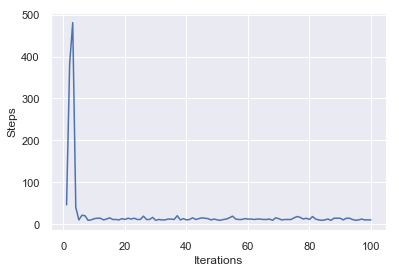

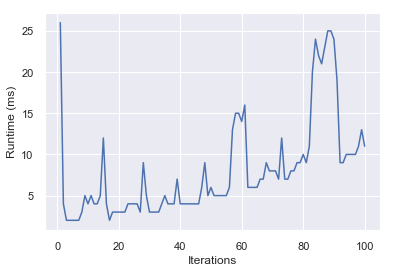

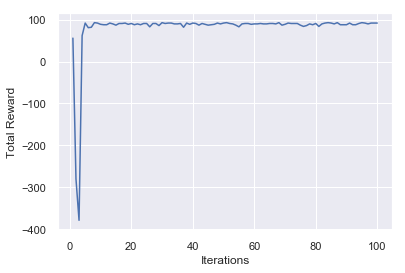

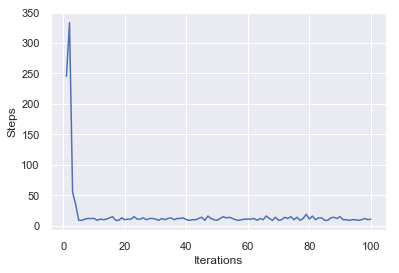

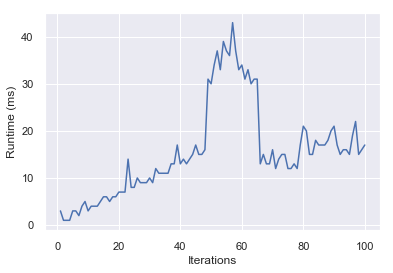

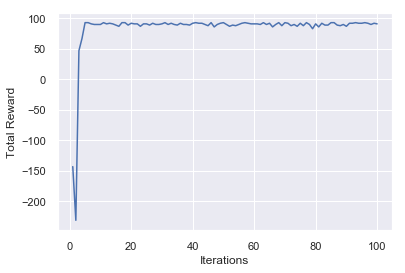

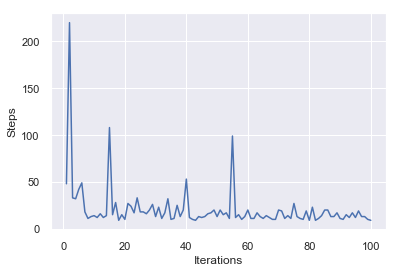

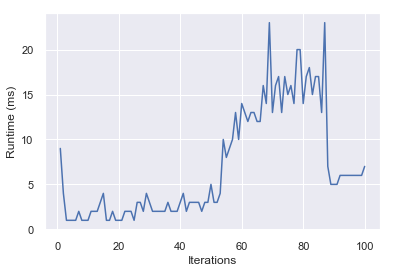

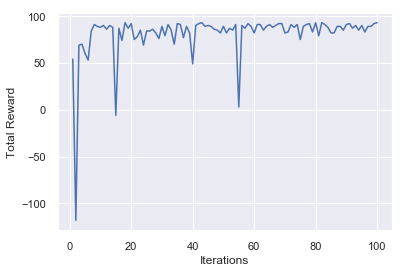

In [52]:
gw1.plot()

In [60]:
data2 = {
    'iter': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
    'vi_steps': [9308,13294,3389,3652,1740,4320,348,205,88,110,45,42,33,54,38,37,39,50,45,40,37,42,45,41,33,36,33,43,41,35,39,42,44,43,36,44,42,36,38,44,38,35,36,45,40,33,38,35,33,36,50,45,44,36,43,43,37,32,42,36,38,36,38,38,30,41,40,42,42,40,42,38,41,32,35,39,31,39,43,34,44,48,39,36,43,32,35,34,36,39,41,38,39,34,39,32,41,41,31,44],
    'vi_time': [54,7,8,10,28,32,18,19,22,22,27,35,38,37,31,41,33,53,78,92,90,97,43,55,51,52,56,52,64,57,58,68,58,67,121,160,153,82,75,76,80,83,85,103,86,86,85,92,94,93,172,209,222,169,95,107,103,111,113,112,115,125,112,115,122,119,140,120,141,133,132,126,132,140,129,144,158,137,142,150,145,148,146,154,158,159,162,163,152,183,166,163,155,164,183,163,171,169,167,178],
    'vi_rewards': [-9206.0,-13192.0,-3287.0,-3550.0,-1638.0,-4218.0,-246.0,-103.0,14.0,-8.0,57.0,60.0,69.0,48.0,64.0,65.0,63.0,52.0,57.0,62.0,65.0,60.0,57.0,61.0,69.0,66.0,69.0,59.0,61.0,67.0,63.0,60.0,58.0,59.0,66.0,58.0,60.0,66.0,64.0,58.0,64.0,67.0,66.0,57.0,62.0,69.0,64.0,67.0,69.0,66.0,52.0,57.0,58.0,66.0,59.0,59.0,65.0,70.0,60.0,66.0,64.0,66.0,64.0,64.0,72.0,61.0,62.0,60.0,60.0,62.0,60.0,64.0,61.0,70.0,67.0,63.0,71.0,63.0,59.0,68.0,58.0,54.0,63.0,66.0,59.0,70.0,67.0,68.0,66.0,63.0,61.0,64.0,63.0,68.0,63.0,70.0,61.0,61.0,71.0,58.0],
    'pi_steps': [10960,44856,21754,52192,22731,4170,1077,3724,992,2820,1932,180,100,58,36,35,34,50,34,42,50,51,44,40,54,38,38,41,35,31,39,38,40,36,35,42,39,38,32,41,49,45,37,41,41,32,38,49,38,29,39,39,46,32,30,38,34,37,57,38,43,39,36,32,32,40,48,30,41,42,32,46,31,36,44,43,46,33,41,40,35,36,46,39,35,40,50,37,33,46,36,48,31,35,41,41,34,35,31,30],
    'pi_time': [10,9,12,15,22,22,25,40,33,40,43,53,48,55,54,58,60,60,66,69,75,80,78,85,82,90,91,96,98,103,102,114,109,116,133,129,126,126,131,136,139,141,141,147,153,148,152,164,155,177,175,168,172,194,176,182,186,187,190,211,200,214,204,208,213,211,215,229,233,232,230,233,248,236,240,244,249,247,253,257,279,268,270,269,294,281,279,288,284,283,297,317,299,303,312,312,324,320,319,328],
    'pi_rewards': [-10858.0,-44754.0,-21652.0,-52090.0,-22629.0,-4068.0,-975.0,-3622.0,-890.0,-2718.0,-1830.0,-78.0,2.0,44.0,66.0,67.0,68.0,52.0,68.0,60.0,52.0,51.0,58.0,62.0,48.0,64.0,64.0,61.0,67.0,71.0,63.0,64.0,62.0,66.0,67.0,60.0,63.0,64.0,70.0,61.0,53.0,57.0,65.0,61.0,61.0,70.0,64.0,53.0,64.0,73.0,63.0,63.0,56.0,70.0,72.0,64.0,68.0,65.0,45.0,64.0,59.0,63.0,66.0,70.0,70.0,62.0,54.0,72.0,61.0,60.0,70.0,56.0,71.0,66.0,58.0,59.0,56.0,69.0,61.0,62.0,67.0,66.0,56.0,63.0,67.0,62.0,52.0,65.0,69.0,56.0,66.0,54.0,71.0,67.0,61.0,61.0,68.0,67.0,71.0,72.0],
    'ql_steps': [1091,1943,1371,1741,721,586,1094,676,90,161,686,284,349,399,334,250,106,152,180,183,112,205,345,119,147,365,115,97,81,255,89,211,167,173,69,170,100,94,101,159,106,98,288,90,154,49,134,54,1018,115,73,175,185,80,59,44,75,90,167,86,234,54,96,72,76,126,100,128,90,38,144,77,150,101,87,56,92,110,60,126,135,47,88,155,262,126,57,142,199,106,46,83,54,305,74,52,170,52,151,129],
    'ql_time': [27,22,28,24,17,21,29,27,15,21,22,23,19,19,33,22,28,25,28,27,27,25,26,24,27,33,32,33,31,32,29,34,53,53,34,35,35,32,32,32,32,38,34,38,39,39,36,34,44,35,43,43,41,35,33,43,31,36,37,44,38,38,43,44,39,46,45,48,45,40,43,46,53,46,45,45,48,50,36,49,42,47,49,52,49,48,53,42,53,48,44,48,53,50,48,53,49,58,63,55],
    'ql_rewards': [-989.0,-1841.0,-1269.0,-1639.0,-619.0,-484.0,-992.0,-574.0,12.0,-59.0,-584.0,-182.0,-247.0,-297.0,-232.0,-148.0,-4.0,-50.0,-78.0,-81.0,-10.0,-103.0,-243.0,-17.0,-45.0,-263.0,-13.0,5.0,21.0,-153.0,13.0,-109.0,-65.0,-71.0,33.0,-68.0,2.0,8.0,1.0,-57.0,-4.0,4.0,-186.0,12.0,-52.0,53.0,-32.0,48.0,-916.0,-13.0,29.0,-73.0,-83.0,22.0,43.0,58.0,27.0,12.0,-65.0,16.0,-132.0,48.0,6.0,30.0,26.0,-24.0,2.0,-26.0,12.0,64.0,-42.0,25.0,-48.0,1.0,15.0,46.0,10.0,-8.0,42.0,-24.0,-33.0,55.0,14.0,-53.0,-160.0,-24.0,45.0,-40.0,-97.0,-4.0,56.0,19.0,48.0,-203.0,28.0,50.0,-68.0,50.0,-49.0,-27.0]
}
gw2 = GridWorldPlotter(data2)

Value Iteration:


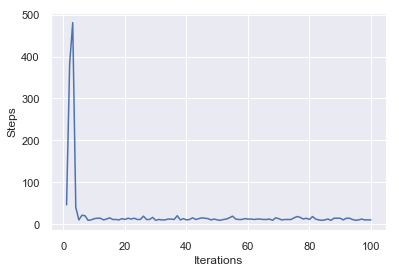

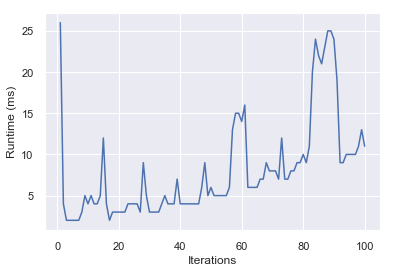

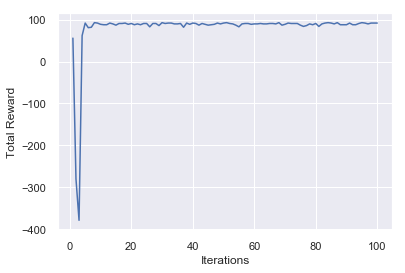

In [69]:
gw1.plot_value_iter()

Policy Iteration:


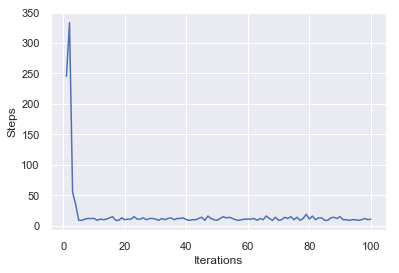

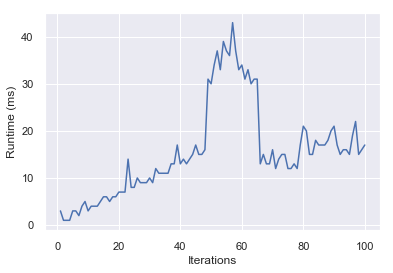

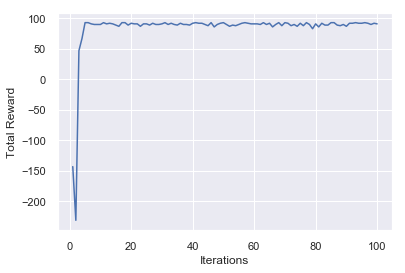

In [68]:
gw1.plot_policy_iter()

Value Iteration:


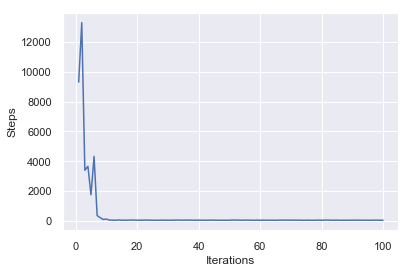

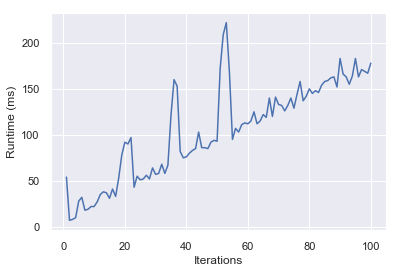

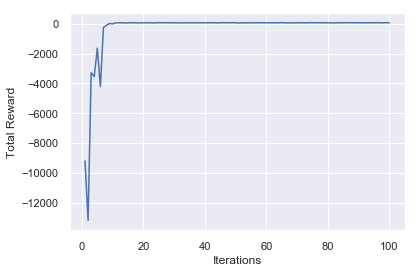

In [70]:
gw2.plot_value_iter()

Policy Iteration:


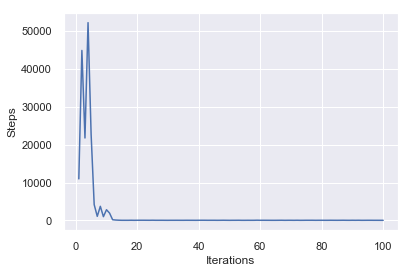

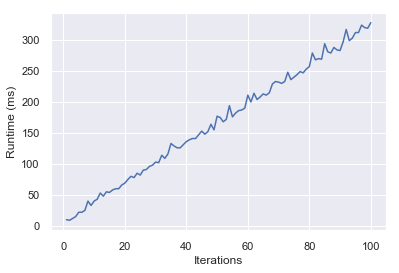

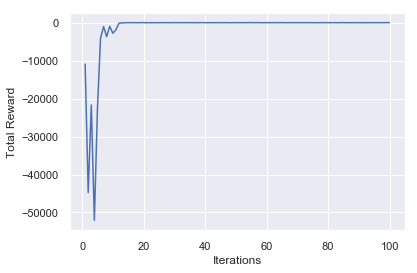

In [71]:
gw2.plot_policy_iter()

Q-learning:


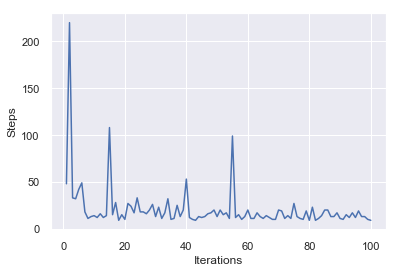

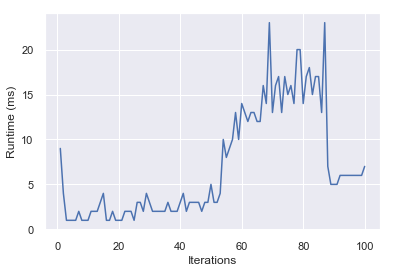

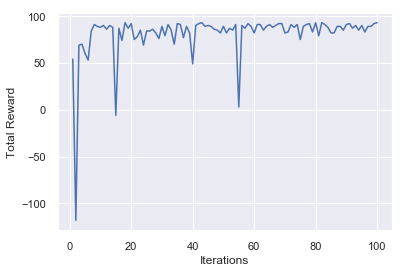

In [72]:
gw1.plot_qlearning()

Q-learning:


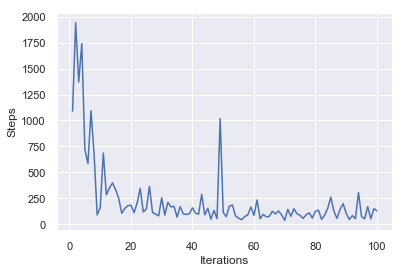

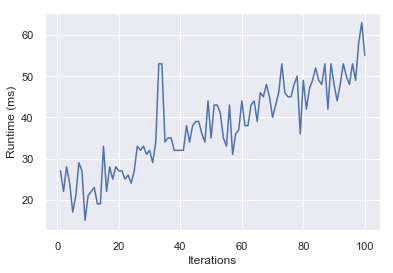

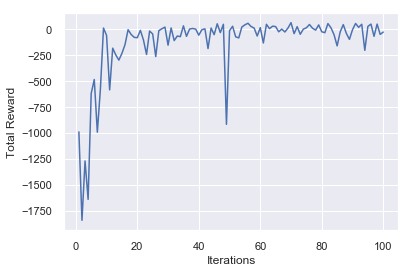

In [73]:
gw2.plot_qlearning()